In [24]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import style, rcParams

style.use('seaborn-darkgrid')

In [2]:
AAPL = pd.read_csv('AAPL.csv', index_col = 0)
AAPL.head()

,DATE,HIGH,LOW,OPEN,CLOSE,VOLUME,ADJ_CLOSE
0,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.604801
1,2010-01-05,7.699643,7.616071,7.664286,7.656428,601904800.0,6.616219
2,2010-01-06,7.686786,7.526786,7.656428,7.534643,552160000.0,6.510980
3,2010-01-07,7.571429,7.466072,7.562500,7.520714,477131200.0,6.498945
4,2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.542150


In [3]:
AAPL.tail()

,DATE,HIGH,LOW,OPEN,CLOSE,VOLUME,ADJ_CLOSE
2679,2020-08-25,125.180000,123.052498,124.697502,124.824997,211495600.0,124.824997
2680,2020-08-26,126.992500,125.082497,126.180000,126.522499,163022400.0,126.522499
2681,2020-08-27,127.485001,123.832497,127.142502,125.010002,155552400.0,125.010002
2682,2020-08-28,126.442497,124.577499,126.012497,124.807503,187151600.0,124.807503
2683,2020-08-31,131.000000,126.000000,127.580002,130.785004,164983627.0,130.785004


In [4]:
AAPL.dtypes

DATE          object
HIGH         float64
LOW          float64
OPEN         float64
CLOSE        float64
VOLUME       float64
ADJ_CLOSE    float64
dtype: object

In [5]:
AAPL = AAPL.astype({'DATE':'datetime64'})
AAPL.dtypes

DATE         datetime64[ns]
HIGH                float64
LOW                 float64
OPEN                float64
CLOSE               float64
VOLUME              float64
ADJ_CLOSE           float64
dtype: object

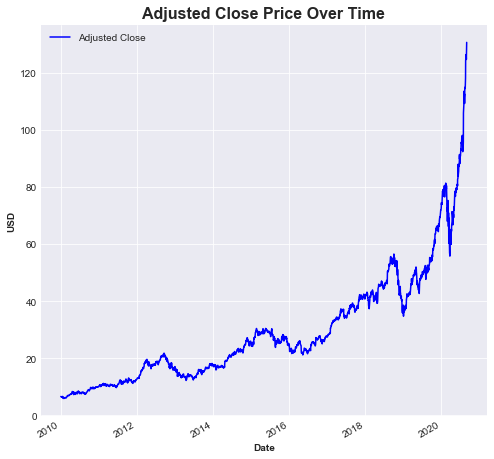

In [32]:
rcParams['figure.figsize'] = 8, 8

AAPL.plot(x = 'DATE', y = 'ADJ_CLOSE', style = 'b-', grid = True)

plt.title('Adjusted Close Price Over Time', fontweight = 'bold', fontsize = 16)
plt.ylabel('USD', fontweight = 'bold')
plt.xlabel('Date', fontweight = 'bold')
plt.legend(['Adjusted Close'], loc = 'upper left')

plt.show();

In [6]:
days = (AAPL['DATE'][AAPL.index[-1]] - AAPL['DATE'][AAPL.index[0]]).days
CAGR = ((((AAPL['ADJ_CLOSE'][AAPL.index[-1]]/AAPL['ADJ_CLOSE'][AAPL.index[0]]))**(365.0/days))-1)
print('CAGR =', str(round(CAGR, 4)*100)+'%')
mu = CAGR
AAPL['RETURNS'] = AAPL['ADJ_CLOSE'].pct_change()
vol = AAPL['RETURNS'].std()*math.sqrt(252)
print('Annual Volatility =', str(round(vol, 4)*100)+'%')

CAGR = 32.31%
Annual Volatility = 27.87%


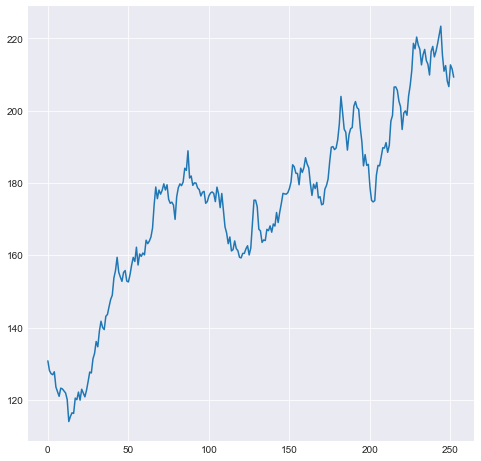

In [26]:
SPrice = AAPL['ADJ_CLOSE'][AAPL.index[-1]]
Time = 252

daily_returns = np.random.normal((mu/Time), vol/math.sqrt(Time),Time)+1

price_list = [SPrice]
for x in daily_returns:
    price_list.append(price_list[-1]*x)
    
rcParams['figure.figsize'] = 8, 8
plt.plot(price_list)
plt.show()

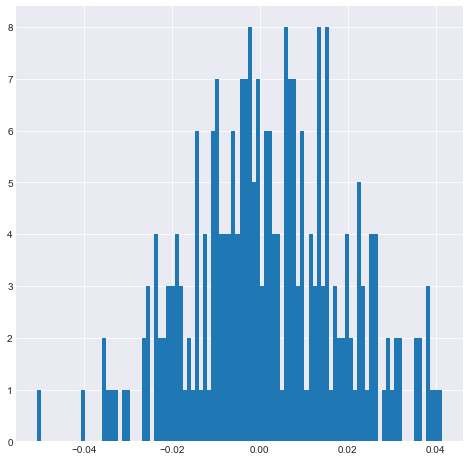

In [27]:
rcParams['figure.figsize'] = 8, 8
plt.hist(daily_returns-1, 100)
plt.show()

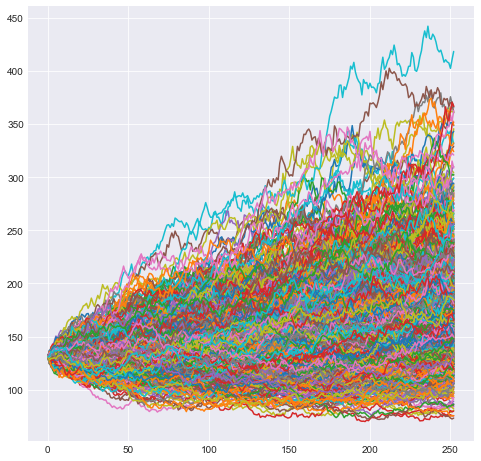

In [36]:
rcParams['figure.figsize'] = 8, 8
for i in range(1000):
    daily_returns = np.random.normal(mu/Time, vol/math.sqrt(Time), Time)+1
    
    price_list = [SPrice]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)
        
    plt.plot(price_list)
    
plt.show()

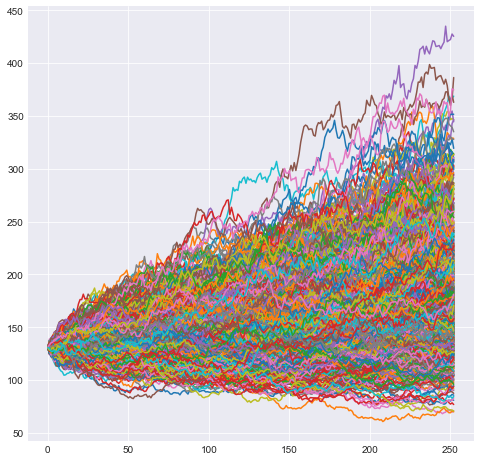

In [39]:
rcParams['figure.figsize'] = 8, 8

results = []

for i in range(1000):
    daily_returns = np.random.normal(mu/Time, vol/math.sqrt(Time), Time)+1
    
    price_list = [SPrice]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)
        
    plt.plot(price_list)
    
    results.append(price_list[-1])
    
plt.show()

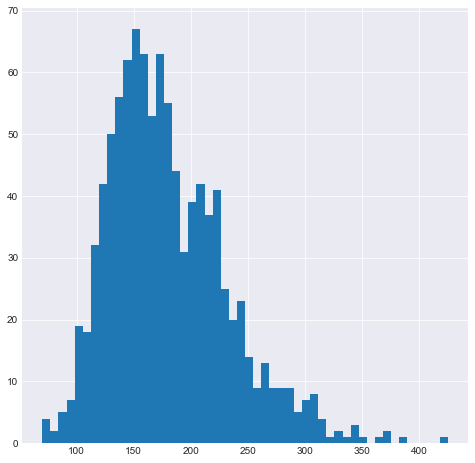

In [40]:
rcParams['figure.figsize'] = 8, 8
plt.hist(results, bins = 50)
plt.show()

In [41]:
price_list

[130.78500366210938,
 130.09209071404035,
 127.15943634996165,
 127.17321649687602,
 128.27527164737117,
 126.39302894757965,
 127.33767708725536,
 129.74022935042873,
 129.43421049110697,
 133.32914451009083,
 132.39869441770276,
 127.06349335771729,
 123.9914192239588,
 124.27361634304636,
 124.06007550337736,
 127.76837517541368,
 125.74776646579322,
 125.06115890450616,
 127.97969235784194,
 128.73800023085596,
 128.07401723894938,
 135.91971796785424,
 136.6392140042828,
 134.74626116779424,
 137.15971584543132,
 137.05877854043635,
 139.452115526107,
 141.70410256765805,
 144.5956328390116,
 140.44133247629284,
 137.9789665261663,
 139.3202507836406,
 136.12819168900248,
 134.21385344749442,
 130.6874806324152,
 129.24605692965332,
 129.37694734410064,
 128.57739668589758,
 129.4471167886206,
 128.9236820898969,
 128.96956624505944,
 126.67598306148919,
 128.04652445784,
 130.56926416067682,
 129.51855858315008,
 130.04780922726692,
 130.6264832024556,
 130.70156830114317,
 132.3

In [42]:
results

[153.5123075904054,
 225.4347582291416,
 158.63870275840952,
 197.0341474472092,
 119.22690807969781,
 200.5486770351717,
 104.40340764996658,
 217.85580937631855,
 98.04777460223724,
 215.31780595856654,
 162.45594699085305,
 178.05929162703845,
 155.31372427047333,
 181.31154594005832,
 138.62402971085083,
 229.48896291499034,
 137.8125667948452,
 157.79730820556978,
 346.4571237954172,
 368.7911245305412,
 198.4490866588047,
 199.80543678006845,
 184.32092189912075,
 217.63872037002022,
 123.3887737218414,
 103.03355980259339,
 225.4957759858479,
 180.28023749804572,
 285.6258050993456,
 115.60448397645064,
 201.7211722487242,
 168.663509998935,
 171.50183224004013,
 220.75016467992384,
 199.56313526950265,
 147.77561100135574,
 209.37196994257337,
 152.1591683463298,
 101.5762012564558,
 187.77920756328547,
 154.97189749790775,
 157.88856002518207,
 184.27620194665187,
 303.34338272264546,
 425.4003290685199,
 241.704039476033,
 70.86035799759918,
 231.56363892444156,
 160.37195253

In [44]:
print('Mean Value =', round(np.mean(results), 2))
print('5% Quantile =', np.percentile(results, 5))
print('95% Percentile =', np.percentile(results, 95))

Mean Value = 180.13
5% Quantile = 111.37746953717385
95% Percentile = 280.74706167881726


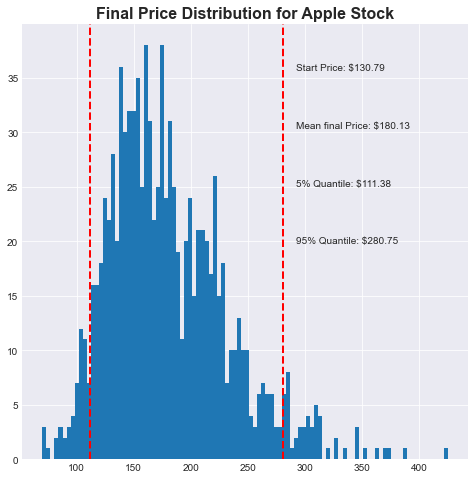

In [52]:
rcParams['figure.figsize'] = 8, 8
plt.hist(results, bins = 100)
plt.axvline(np.percentile(results, 5), color = 'r', linestyle = 'dashed', linewidth = 2)
plt.axvline(np.percentile(results, 95), color = 'r', linestyle = 'dashed', linewidth = 2)
plt.figtext(0.6, 0.8, s = 'Start Price: $%.2f'%SPrice)
plt.figtext(0.6, 0.7, 'Mean final Price: ${}'.format(str(round(np.mean(results), 2))))
plt.figtext(0.6, 0.6, '5% Quantile: ${}'.format(str(round(np.percentile(results, 5), 2))))
plt.figtext(0.6, 0.5, '95% Quantile: ${}'.format(str(round(np.percentile(results, 95), 2))))
plt.title('Final Price Distribution for Apple Stock', weight = 'bold', fontsize = 16)
plt.show()

In [53]:
monte_carlo = monte_carlo_forecast.iloc[:,:].values
rcParams['figure.figsize'] = 8, 8
plt.plot(monte_carlo)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Monte-Carlo Simulation vs. Actual Price', fontsize = 12)
plt.show()

NameError: name 'monte_carlo_forecast' is not defined